# My first cortical thickness analysis

## Getting started
First, we need to import necessary libraries to load and plot our data.

**Aru ➡️ add comments to say what each block does (complete the line after the # symbol)**

**Aru ➡️ for each cell, say how we can improve the two lines at the end indicating the run status**

In [1]:
# 
import sys
import time
import os
from pathlib import Path
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from tqdm import tqdm
from nilearn import plotting
from surfplot import Plot

start_time = time.time()
print(f"[{time.strftime('%H:%M:%S')}] ✅ Cell 1: Imports and Paths loaded.")

[16:21:09] ✅ Cell 1: Imports and Paths loaded.


Next, let's set up some things we'll need for this tutorial, including data paths and subjects lists.

**Aru ➡️ add comments to say what each block does**

In [2]:
#
repo_dir = Path("/data/u_royer_software/aru_review/struct_proc_tutorial")
utilities_dir = repo_dir / "utilities"
analysis_dir = repo_dir / "analysis"

#
lh_tom_mask = utilities_dir / "theory_mind_association-test_z_lh.shape.gii"
rh_tom_mask = utilities_dir / "theory_mind_association-test_z_rh.shape.gii"

# 
lh_fsLR_name = utilities_dir / "fsLR-32k.L.midthickness.surf.gii"
rh_fsLR_name = utilities_dir / "fsLR-32k.L.midthickness.surf.gii"

#
deriv_dir = Path("/data/p_03140/BIDS_spacetop/derivatives")
micapipe_dir = deriv_dir / "micapipe_v0.2.0"

#
subjects = [
    "0001","0002","0003","0004","0005","0007","0008",
    "0009","0011","0013","0014","0015","0016","0017"
]

print(f"[{time.strftime('%H:%M:%S')}] ✅ Cell 1: Imports and Paths loaded.")

[16:21:09] ✅ Cell 1: Imports and Paths loaded.


What does this do?

**Aru ➡️ add comments**

In [4]:
# 
try:
    fsLR_surf_dir_base = micapipe_dir / "sub-0001" / "ses-01" / "surf" 
    fs_lh_surf_32k = str(fsLR_surf_dir_base / "sub-0001_ses-01_hemi-L_space-nativepro_surf-fsLR-32k_label-midthickness.surf.gii")
    fs_rh_surf_32k = str(fsLR_surf_dir_base / "sub-0001_ses-01_hemi-R_space-nativepro_surf-fsLR-32k_label-midthickness.surf.gii")
    # 
    if not Path(fs_lh_surf_32k).exists() or not Path(fs_rh_surf_32k).exists():
        raise FileNotFoundError("Could not find representative fsLR-32k surface files.")
    print(f"[{time.strftime('%H:%M:%S')}] ✅ Using fsLR-32k midthickness surfaces for plotting: {fs_lh_surf_32k}")
except FileNotFoundError as e:
    print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR: {e}. Check micapipe output structure.")
    # 
    fs_lh_surf_32k = None
    fs_rh_surf_32k = None
except Exception as e:
     print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR setting surface paths: {e}")
     fs_lh_surf_32k = None
     fs_rh_surf_32k = None

print(f"[{time.strftime('%H:%M:%S')}] ✅ Paths configured.")

[16:21:58] ✅ Using fsLR-32k midthickness surfaces for plotting: /data/p_03140/BIDS_spacetop/derivatives/micapipe_v0.2.0/sub-0001/ses-01/surf/sub-0001_ses-01_hemi-L_space-nativepro_surf-fsLR-32k_label-midthickness.surf.gii
[16:21:58] ✅ Paths configured.


Load data

**Aru ➡️ add comments**

In [5]:
#
print(f"[{time.strftime('%H:%M:%S')}] 🚀 Loading pre-resampled thickness data (fsLR-32k)...")

lh_all_32k, rh_all_32k = [], []
missing_subs = []

for sub in tqdm(subjects, desc=f"[{time.strftime('%H:%M:%S')}] Loading fsLR-32k thickness"):
    lh_found, rh_found = False, False
    for ses in ["01"]: # Assuming session 01
        sub_dir = micapipe_dir / f"sub-{sub}" / f"ses-{ses}" / "maps"
        
        # 
        lh_file = sub_dir / f"sub-{sub}_ses-{ses}_hemi-L_surf-fsLR-32k_label-thickness.func.gii"
        rh_file = sub_dir / f"sub-{sub}_ses-{ses}_hemi-R_surf-fsLR-32k_label-thickness.func.gii"

        # 
        if lh_file.exists():
            try:
                lh_data = nib.load(str(lh_file)).darrays[0].data
                # 
                if lh_data.shape == (32492,):
                    lh_all_32k.append(lh_data)
                    lh_found = True
                else:
                     print(f"[{time.strftime('%H:%M:%S')}] ⚠️ Unexpected shape {lh_data.shape} for {lh_file}. Skipping.")
            except Exception as e:
                print(f"[{time.strftime('%H:%M:%S')}] ⚠️ Error loading {lh_file}: {e}")
        
        # 
        if rh_file.exists():
            try:
                rh_data = nib.load(str(rh_file)).darrays[0].data
                if rh_data.shape == (32492,):
                    rh_all_32k.append(rh_data)
                    rh_found = True
                else:
                    print(f"[{time.strftime('%H:%M:%S')}] ⚠️ Unexpected shape {rh_data.shape} for {rh_file}. Skipping.")
            except Exception as e:
                print(f"[{time.strftime('%H:%M:%S')}] ⚠️ Error loading {rh_file}: {e}")

    # 
    if not lh_found or not rh_found:
        missing_subs.append(sub)
        print(f"[{time.strftime('%H:%M:%S')}] ⚠️ Missing fsLR-32k thickness data for sub-{sub}")

if missing_subs:
     print(f"[{time.strftime('%H:%M:%S')}] ⚠️ Summary: Missing data for subjects: {', '.join(missing_subs)}")


[16:22:12] 🚀 Loading pre-resampled thickness data (fsLR-32k)...


[16:22:12] Loading fsLR-32k thickness: 100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 109.20it/s]


What does this do?

**Aru ➡️ add comments**

In [6]:
# 
try:
    if not lh_all_32k or not rh_all_32k:
         raise ValueError("No valid data loaded.")
         
    lh_all_32k = np.vstack(lh_all_32k)
    rh_all_32k = np.vstack(rh_all_32k)
    N_subjects = lh_all_32k.shape[0]
    
    print(f"[{time.strftime('%H:%M:%S')}] ✅ Loaded fsLR-32k thickness data from {N_subjects} subjects.")
    print(f"   LH shape: {lh_all_32k.shape}, RH shape: {rh_all_32k.shape}") 
    
except ValueError as e:
    print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR: Stacking failed. {e}")
    # 
    raise SystemExit("Cannot proceed without loaded data.")
except Exception as e:
    print(f"[{time.strftime('%H:%M:%S')}] ❌ An unexpected error occurred during stacking: {e}")
    raise SystemExit("Cannot proceed.")

[16:22:16] ✅ Loaded fsLR-32k thickness data from 14 subjects.
   LH shape: (14, 32492), RH shape: (14, 32492)


What does this do?

**Aru ➡️ add comments**

In [7]:
# 
try:
    lh_mean_32k = lh_all_32k.mean(axis=0)
    rh_mean_32k = rh_all_32k.mean(axis=0)
    print(f"[{time.strftime('%H:%M:%S')}] ✅ Computed group mean cortical thickness (fsLR-32k).")
except NameError:
     print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR: Thickness data not loaded successfully. Cannot compute mean.")
     # 
     raise SystemExit("Cannot proceed without mean thickness.")
except Exception as e:
     print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR computing mean: {e}")
     raise SystemExit("Cannot proceed.")

[16:22:18] ✅ Computed group mean cortical thickness (fsLR-32k).


What does this do?

**Aru ➡️ add comments**

In [8]:
# 
try:
    lh_tom_data_32k = nib.load(str(lh_tom_mask)).darrays[0].data
    rh_tom_data_32k = nib.load(str(rh_tom_mask)).darrays[0].data
    # 
    if lh_tom_data_32k.shape != (32492,) or rh_tom_data_32k.shape != (32492,):
         raise ValueError(f"ToM map shape is wrong: LH={lh_tom_data_32k.shape}, RH={rh_tom_data_32k.shape}, expected (32492,)")
    print(f"[{time.strftime('%H:%M:%S')}] ✅ Loaded ToM association maps (fsLR-32k).")
except FileNotFoundError as e:
    print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR: ToM maps not found. Check path: {e.filename}")
    # 
    raise SystemExit("Cannot proceed without ToM maps.")
except ValueError as e:
     print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR: {e}")
     raise SystemExit("Cannot proceed.")
except Exception as e:
    print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR loading ToM maps: {e}")
    raise SystemExit("Cannot proceed.")

[16:22:20] ✅ Loaded ToM association maps (fsLR-32k).


What does this do?

**Aru ➡️ add comments**

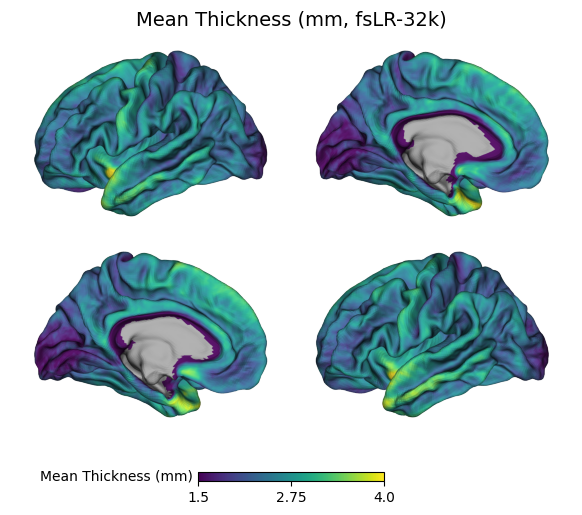

In [9]:
# 
if fs_lh_surf_32k is None or fs_rh_surf_32k is None:
    print(f"[{time.strftime('%H:%M:%S')}] ⚠️ WARNING: fsLR-32k surface paths not found in Cell 1. Skipping SurfPlot.")
else:
    try:
        p = Plot(
            surf_lh=lh_fsLR_name, # Use the 32k midthickness surface path
            surf_rh=lh_fsLR_name, # Use the 32k midthickness surface path
            size=(700, 500),
        )

        # 
        data = np.asarray([*lh_mean_32k,*rh_mean_32k], dtype=np.float32)
        p.add_layer(data, cmap="viridis", cbar=True, color_range=(1.5, 4), cbar_label="Mean Thickness (mm)")

        fig = p.build()
        plt.title("Mean Thickness (mm, fsLR-32k)", fontsize=14)
        plt.show()

    except FileNotFoundError:
        print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR: Cannot find fsLR-32k surfaces at {fs_lh_surf_32k}. Skipping SurfPlot plot.")
    except Exception as e:
        print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR during SurfPlot plotting: {e}")


What does this do?

**Aru ➡️ add comments**

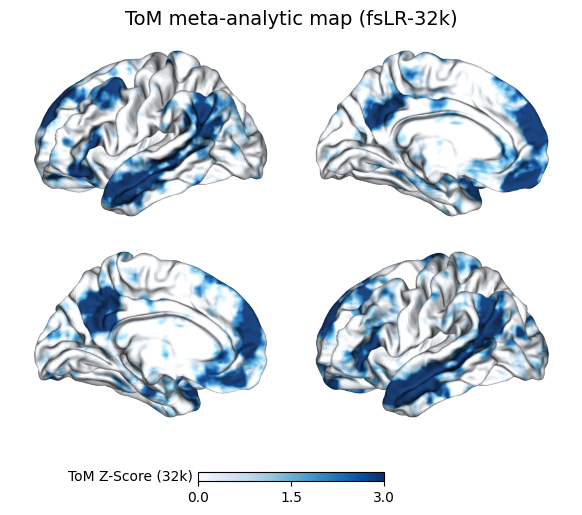

In [10]:
# 
if fs_lh_surf_32k is None or fs_rh_surf_32k is None:
    print(f"[{time.strftime('%H:%M:%S')}] ⚠️ WARNING: fsLR-32k surface paths not found in Cell 1. Skipping SurfPlot.")
else:
    try:
        p = Plot(
            surf_lh=lh_fsLR_name, # Use the 32k midthickness surface path
            surf_rh=lh_fsLR_name, # Use the 32k midthickness surface path
            size=(700, 500),
        )

        # 
        masks = np.asarray([*lh_tom_data_32k,*rh_tom_data_32k], dtype=np.float32)
        p.add_layer(
            masks, 
            cmap="Blues", 
            cbar=True, 
            color_range=(0, 3), 
            cbar_label="ToM Z-Score (32k)")

        fig = p.build()
        plt.title("ToM meta-analytic map (fsLR-32k)", fontsize=14)
        plt.show()

    except FileNotFoundError:
        print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR: Cannot find fsLR-32k surfaces at {fs_lh_surf_32k}. Skipping SurfPlot plot.")
    except Exception as e:
        print(f"[{time.strftime('%H:%M:%S')}] ❌ ERROR during SurfPlot plotting: {e}")